<Figure size 640x480 with 0 Axes>

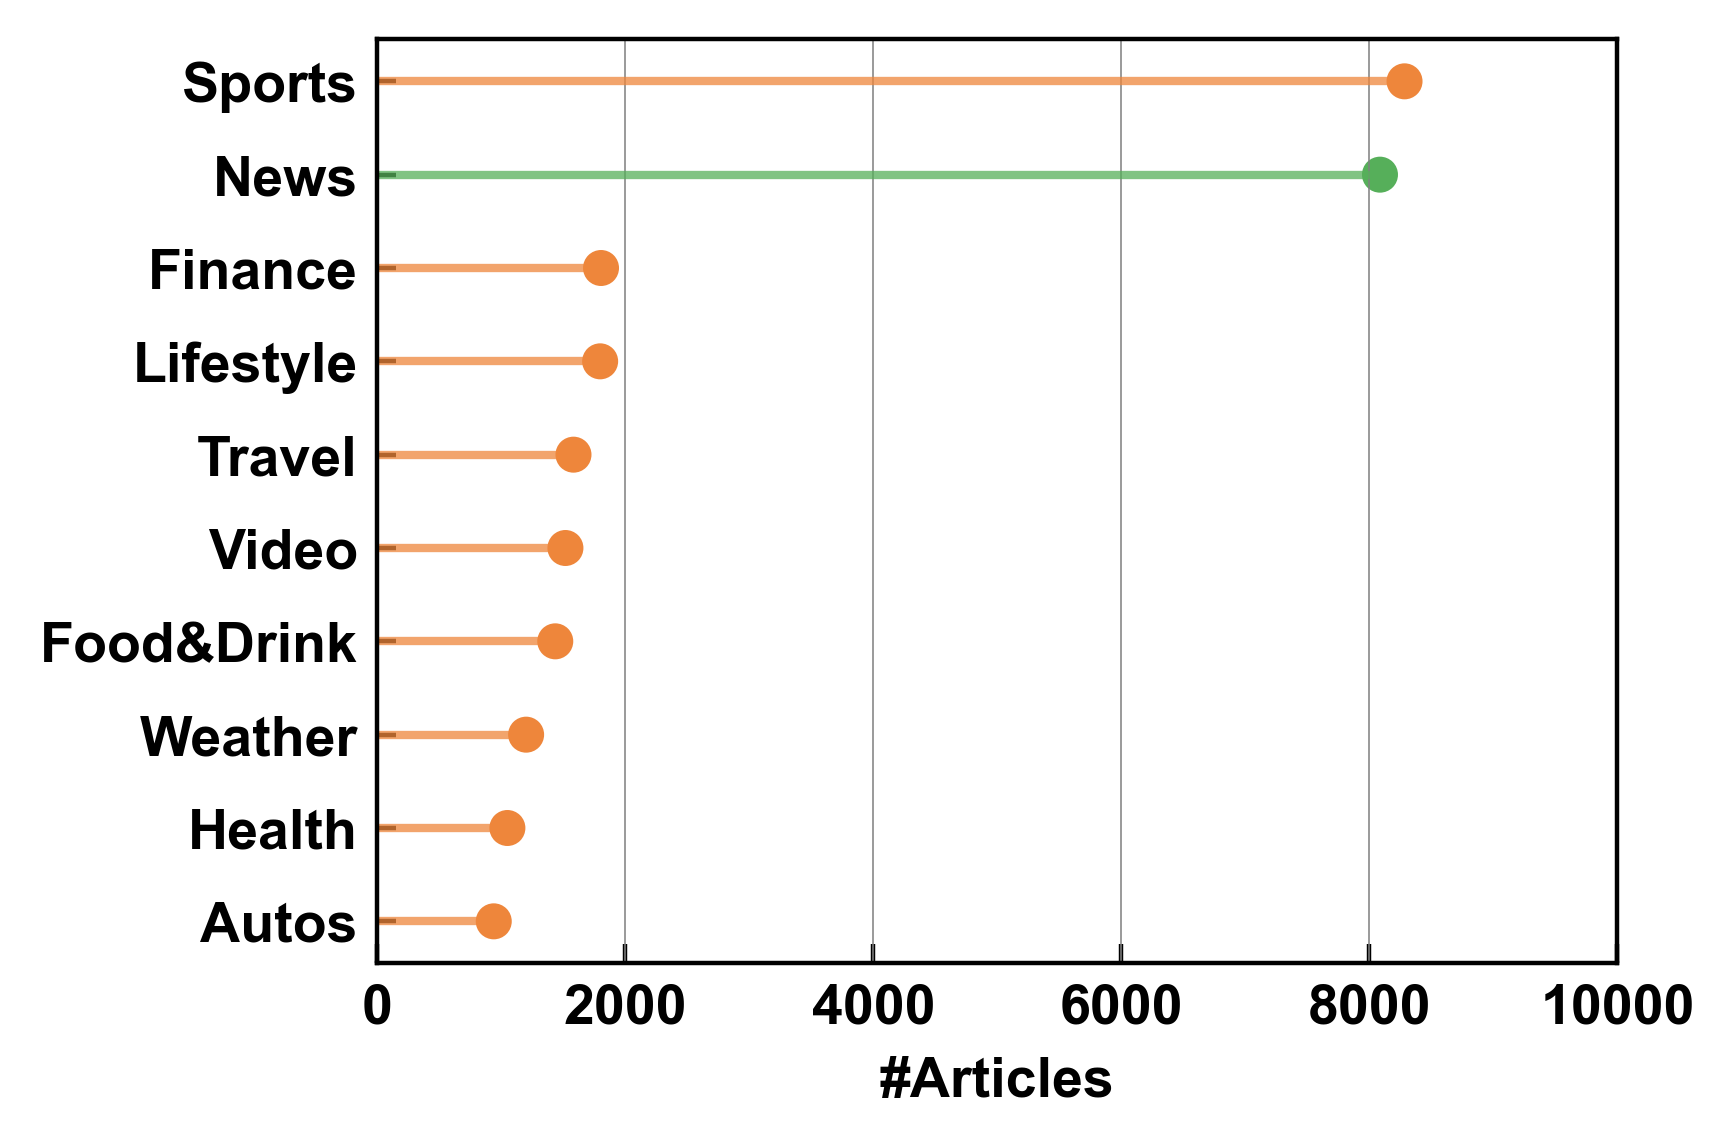

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sys
from collections import defaultdict
# sys.setrecursionlimit(20000)
# print(sys.getrecursionlimit())

with open('../../data/i2cdf.pkl', 'rb') as file:
    i2c = pickle.load(file)
cate_arr = i2c.values.squeeze()
cate_dict = defaultdict(int)
for cateid in cate_arr:
    cate_dict[cateid] += 1
    
VALUES = np.array(list(cate_dict.values()))
# print(VALUES)
sorted_indices = np.argsort(VALUES)
LABELS = np.array(['Lifestyle', 'Health', 'News', 'Autos', 'TV', 'Food&Drink', 'Travel', 'Sports', 'Finance', 'Weather', 'Movies', 'Entertainment', 'Video', 'Kids', 'Music', 'North America'])
VALUES, LABELS = VALUES[sorted_indices], LABELS[sorted_indices]

# a8a495 0d75f8 9a0200 53B25F a9ddd4 2c7fb8
my_range = [i for i in range(len(cate_dict))]
my_color = (['#EE863B','#56AF5A']+['#EE863B' for i in range(len(cate_dict)-2)])[::-1]
my_size = ([30,30]+[30 for i in range(len(cate_dict)-2)])[::-1]
VALUES, LABELS, my_range, my_color, my_size = VALUES[-10:], LABELS[-10:], my_range[:10], my_color[-10:], my_size[-10:]

plt.figure()
fig, ax = plt.subplots(figsize=(4,3),dpi=400)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

plt.yticks(fontproperties='Arial', size=10, weight='bold')
plt.xticks(fontproperties='Arial', size=10, weight='bold')
plt.tick_params(direction='in')
plt.axvline(x=2000, c="grey", ls="-", lw=0.28)
plt.axvline(x=4000, c="grey", ls="-", lw=0.28)
plt.axvline(x=6000, c="grey", ls="-", lw=0.28)
plt.axvline(x=8000, c="grey", ls="-", lw=0.28)

ax.hlines(y=my_range, xmin=0, xmax=VALUES, color=my_color, alpha=0.75, ls='-')
ax.scatter(VALUES, my_range, color=my_color, s=my_size, alpha=1)
ax.set_yticks(my_range, LABELS)

ax.set_xlim((0,10000))
ax.set_xticks([0,2000,4000,6000,8000,10000])
ax.set_xlabel('#Articles', fontproperties='Arial', fontweight='bold')
# plt.ylabel('Category')
# ax.set_title("Top-10 categories of all articles", loc='left', fontproperties='Arial', fontweight='bold')
plt.savefig('./figures/category_distribution_S1A.pdf', dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()

<Figure size 640x480 with 0 Axes>

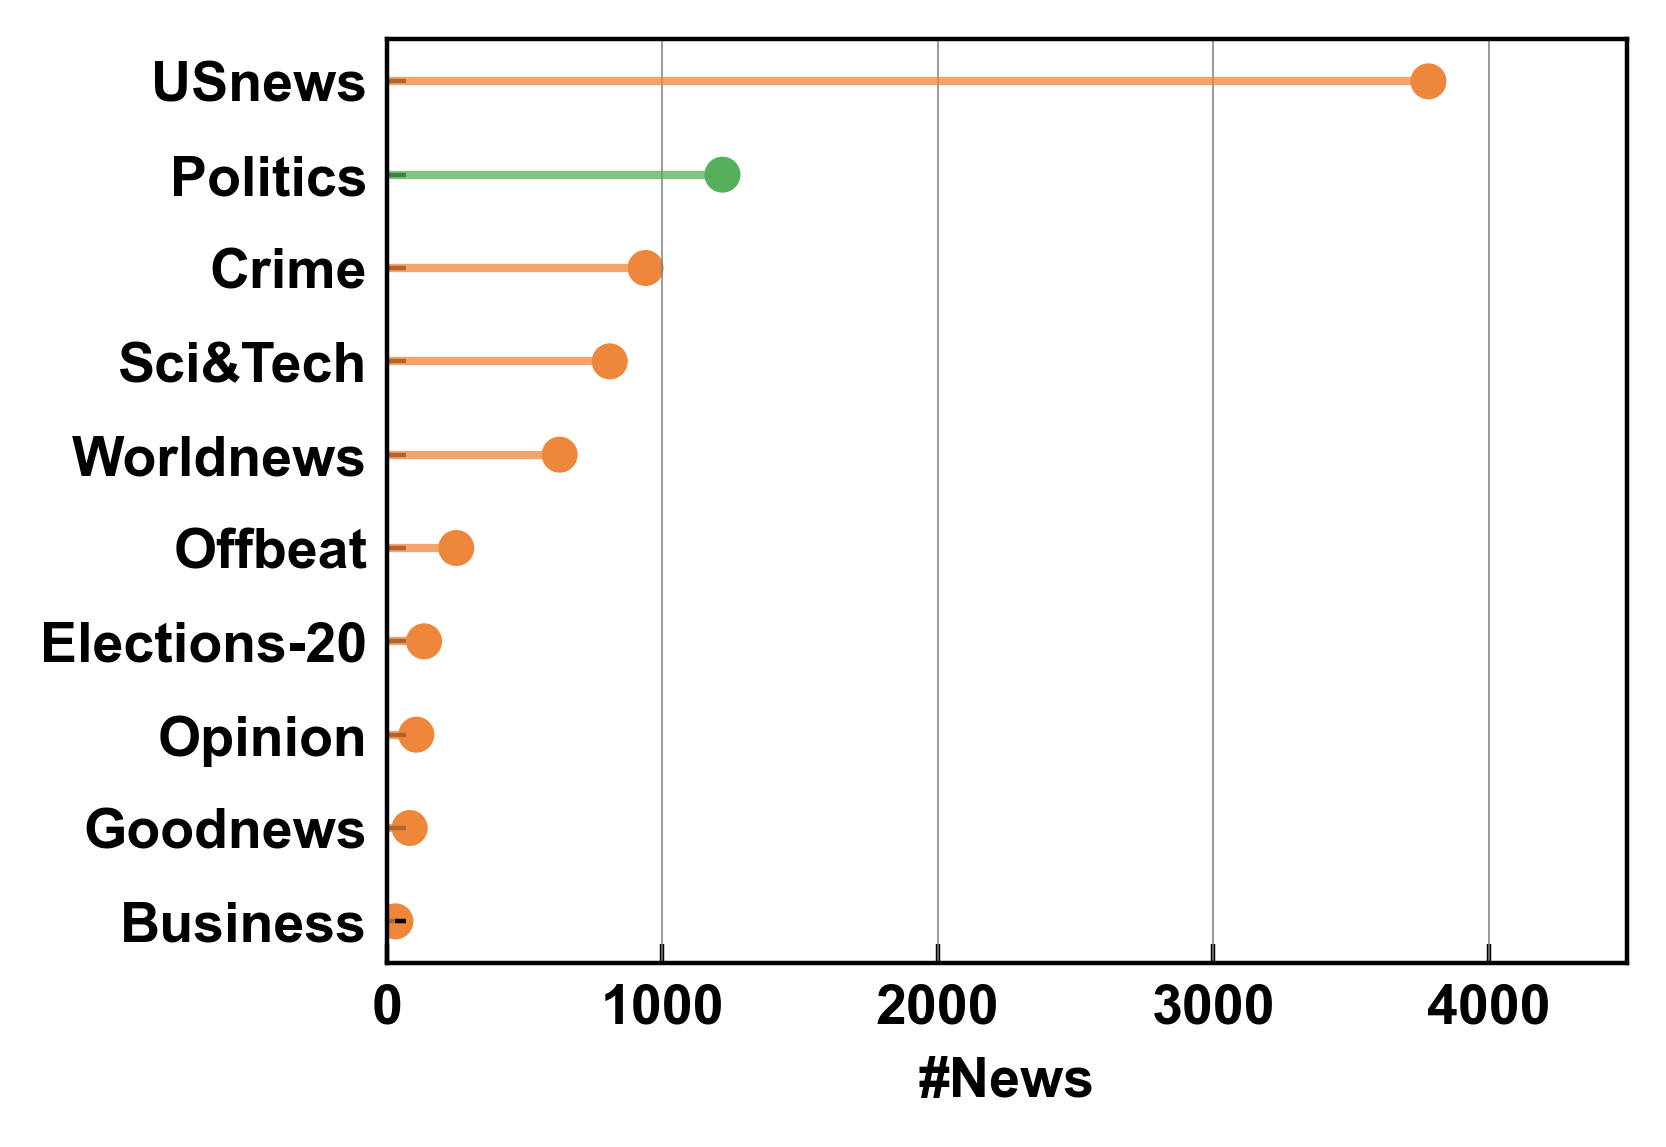

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

news = pd.read_csv('../../data/all_news.csv').set_index('i')
subcategory_list = list(news['subcategory'])
subcate_dict = defaultdict(int)
for subcate in subcategory_list:
    subcate_dict[subcate] += 1

subcate_arr, count_arr = np.array(list(subcate_dict.keys())), np.array(list(subcate_dict.values()))
sorted_indices = np.argsort(count_arr)[-10:]
subcate_arr, count_arr = subcate_arr[sorted_indices], count_arr[sorted_indices]
my_color = ['#EE863B','#56AF5A','#EE863B','#EE863B','#EE863B','#EE863B','#EE863B','#EE863B','#EE863B','#EE863B'][::-1]
my_size = [30,30,30,30,30,30,30,30,30,30][::-1]

plt.figure()
fig, ax = plt.subplots(figsize=(4,3),dpi=400)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
plt.yticks(fontproperties='Arial', size=10, weight='bold')
plt.xticks(fontproperties='Arial', size=10, weight='bold')
plt.tick_params(direction='in')

plt.axvline(x=1000, c="grey", ls="-", lw=0.28)
plt.axvline(x=2000, c="grey", ls="-", lw=0.28)
plt.axvline(x=3000, c="grey", ls="-", lw=0.28)
plt.axvline(x=4000, c="grey", ls="-", lw=0.28)

ax.hlines(y=[i for i in range(10)], xmin=0, xmax=count_arr, color=my_color, alpha=0.75, ls='-')
ax.scatter(count_arr, [i for i in range(10)], color=my_color, s=my_size, alpha=1)
subcate_arr = ['Business', 'Goodnews', 'Opinion', 'Elections-20', 'Offbeat', 'Worldnews', 'Sci&Tech', 'Crime', 'Politics', 'USnews']
ax.set_yticks([i for i in range(10)], subcate_arr)

ax.set_xlim((0,4500))
ax.set_xticks([0,1000,2000,3000,4000])
ax.set_xlabel('#News', fontproperties='Arial', fontweight='bold')
# ax.set_title('Top-10 subcategories of News', loc='left', fontproperties='Arial', fontweight='bold')
plt.savefig('./figures/news_subcategory_distribution_S1B.pdf', dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()